In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter
import itertools
import pickle
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!
from yellowbrick.features import ParallelCoordinates
from sklearn.model_selection import StratifiedKFold
from collections import defaultdict
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
from yellowbrick.classifier import ClassBalance
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ClassificationReport
from sklearn import linear_model, svm, naive_bayes, neighbors, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.ensemble import RandomForestClassifier



from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from matplotlib import gridspec

from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg'

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [7]:
df_1 = pd.read_pickle("./dummy.pkl")
df_2 = pd.read_pickle("./lda3_df.pkl")

In [8]:
df_2.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,...,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,dominant_topic
Doc0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.00,13
Doc1,0.00,0.06,0.0,0.08,0.0,0.01,0.00,0.0,0.08,0.0,...,0.0,0.66,0.07,0.00,0.00,0.00,0.00,0.00,0.03,12
Doc2,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.00,0.08,0.08,0.00,0.18,0.00,0.00,0.64,19
Doc3,0.99,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
Doc4,0.07,0.00,0.0,0.00,0.0,0.02,0.04,0.0,0.00,0.0,...,0.0,0.00,0.00,0.06,0.02,0.00,0.72,0.07,0.00,17


In [9]:
df_2['dominant_topic'] = df_2['dominant_topic'].astype(int)

In [10]:
df_2.reset_index(inplace=True)

In [11]:
smaller_df = df_1[:30000]

In [12]:
smaller_df['dominant_topic']= df_2['dominant_topic']

/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
smaller_df.head()

,project_is_approved,id,teacher_id,school_state,project_submitted_datetime,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,...,Region_SOUTH,Region_WEST,project_subject_categories_new_Health & Sports,project_subject_categories_new_History & Civics,project_subject_categories_new_Literacy & Language,project_subject_categories_new_Math & Science,project_subject_categories_new_Music & The Arts,project_subject_categories_new_Special Needs,project_subject_categories_new_Warmth,dominant_topic
0,1,p036502,484aaf11257089a66cfedc9461c6bd0a,NV,2016-11-18 14:45:59,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,...,0,1,0,0,1,0,0,0,0,13
1,0,p039565,df72a3ba8089423fa8a94be88060f6ed,GA,2017-04-26 15:57:28,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,...,1,0,0,0,0,0,1,0,0,12
2,1,p233823,a9b876a9252e08a55e3d894150f75ba3,UT,2017-01-01 22:57:44,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,...,0,1,0,0,0,1,0,0,0,19
3,0,p185307,525fdbb6ec7f538a48beebaa0a51b24f,NC,2016-08-12 15:42:11,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",...,1,0,1,0,0,0,0,0,0,0
4,1,p013780,a63b5547a7239eae4c1872670848e61a,CA,2016-08-06 09:09:11,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,...,0,1,1,0,0,0,0,0,0,17


In [14]:
new_df = smaller_df

In [15]:
list(new_df)

['project_is_approved',
 'id',
 'teacher_id',
 'school_state',
 'project_submitted_datetime',
 'project_subject_categories',
 'project_subject_subcategories',
 'project_title',
 'project_essay_1',
 'project_essay_2',
 'project_resource_summary',
 'teacher_number_of_previously_posted_projects_x',
 'price_x',
 'quantity_x',
 'Avg_Price_Per_Quantity_x',
 'teacher_prefix_Mr.',
 'teacher_prefix_Mrs.',
 'teacher_prefix_Ms.',
 'teacher_prefix_Teacher',
 'project_grade_category_Grades 6-8',
 'project_grade_category_Grades 9-12',
 'project_grade_category_Grades PreK-2',
 'Region_NORTHEAST',
 'Region_SOUTH',
 'Region_WEST',
 'project_subject_categories_new_Health & Sports',
 'project_subject_categories_new_History & Civics',
 'project_subject_categories_new_Literacy & Language',
 'project_subject_categories_new_Math & Science',
 'project_subject_categories_new_Music & The Arts',
 'project_subject_categories_new_Special Needs',
 'project_subject_categories_new_Warmth',
 'dominant_topic']

In [16]:
#get price per quanitity of items requested
new_df['Total_Price_Per_Quantity'] = (new_df['price_x']*new_df['quantity_x']).round(2)

/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 34 columns):
project_is_approved                                   30000 non-null int64
id                                                    30000 non-null object
teacher_id                                            30000 non-null object
school_state                                          30000 non-null object
project_submitted_datetime                            30000 non-null object
project_subject_categories                            30000 non-null object
project_subject_subcategories                         30000 non-null object
project_title                                         30000 non-null object
project_essay_1                                       30000 non-null object
project_essay_2                                       30000 non-null object
project_resource_summary                              30000 non-null object
teacher_number_of_previously_posted_projects_x        30

In [18]:
new_df = pd.get_dummies(new_df, columns = ['dominant_topic'], drop_first = True)

In [19]:
new_df.head()

,project_is_approved,id,teacher_id,school_state,project_submitted_datetime,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,...,dominant_topic_10,dominant_topic_11,dominant_topic_12,dominant_topic_13,dominant_topic_14,dominant_topic_15,dominant_topic_16,dominant_topic_17,dominant_topic_18,dominant_topic_19
0,1,p036502,484aaf11257089a66cfedc9461c6bd0a,NV,2016-11-18 14:45:59,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,...,0,0,0,1,0,0,0,0,0,0
1,0,p039565,df72a3ba8089423fa8a94be88060f6ed,GA,2017-04-26 15:57:28,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,...,0,0,1,0,0,0,0,0,0,0
2,1,p233823,a9b876a9252e08a55e3d894150f75ba3,UT,2017-01-01 22:57:44,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,...,0,0,0,0,0,0,0,0,0,1
3,0,p185307,525fdbb6ec7f538a48beebaa0a51b24f,NC,2016-08-12 15:42:11,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",...,0,0,0,0,0,0,0,0,0,0
4,1,p013780,a63b5547a7239eae4c1872670848e61a,CA,2016-08-06 09:09:11,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,...,0,0,0,0,0,0,0,1,0,0


In [20]:
#select features for testing
df4 = new_df.drop(['id', 'school_state', 'project_subject_categories','project_subject_subcategories','project_title',
                'project_essay_1','project_essay_2','project_resource_summary','Avg_Price_Per_Quantity_x','teacher_id','project_submitted_datetime'],axis=1)

In [22]:
#split data into 80/20 train and test split and standardize

X, y = df4.drop('project_is_approved',axis=1), df4['project_is_approved']

# hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10, stratify=y)

## Fits Standard Scaler to the training data
std = StandardScaler()
std.fit(X_train.values)

#applies the scaler to the train and test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

### Random Forest Model

In [24]:
#balance
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_tr,y_train)

In [25]:
model_params = {
    'bootstrap': [True],
    'max_depth': [3],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [26]:
# create random forest classifier model with balanced dataset
rf_model = RandomForestClassifier(random_state=1)

# set up grid search meta-estimator
clf = GridSearchCV(rf_model, model_params, cv=5)

# train the grid search meta-estimator to find the best model
model = clf.fit(X_smoted, y_smoted)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 2,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [28]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.65      0.23      0.33      2629
           1       0.60      0.90      0.72      3371

    accuracy                           0.61      6000
   macro avg       0.62      0.56      0.53      6000
weighted avg       0.62      0.61      0.55      6000



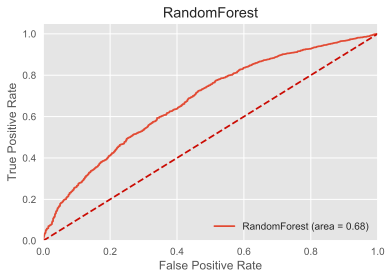

In [29]:
probs = model.predict_proba(X_te)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest')
plt.legend(loc="lower right")
plt.savefig('RandomForest5.svg', transparent=True, bbox_inches='tight')
plt.show()

In [32]:
roc_auc

0.6776156884948685

In [33]:
classes = model.predict(X_te)
    
accuracy = metrics.accuracy_score(classes, y_test)
    
balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

precision = metrics.precision_score(classes, y_test)
    
average_precision = metrics.average_precision_score(classes, y_test)
    
f1_score = metrics.f1_score(classes, y_test)
    
recall = metrics.recall_score(classes, y_test)

ROC_AUC = metrics.roc_auc_score(classes, y_test)

print (accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc)

0.6068333333333333 0.5648300300179669 0.5994887927644514 0.5958919200451337 0.7210594773560364 0.9044793829724117 0.6776156884948685


In [34]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.65      0.23      0.33      2629
           1       0.60      0.90      0.72      3371

    accuracy                           0.61      6000
   macro avg       0.62      0.56      0.53      6000
weighted avg       0.62      0.61      0.55      6000



In [48]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_smoted)[:, 1] >= threshold)
    churn_confusion = confusion_matrix(y_smoted, y_predict)
    plt.figure(dpi=80)
    heatmap1 = sns.heatmap(churn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no approve', 'approve'],
           yticklabels=['no approve', 'approve']);
    bottom, top = heatmap1.get_ylim() #to fix the cutting off on top/bottom
    heatmap1.set_ylim(bottom + 0.5, top - 0.5) #to fix the cutting off on top/bottom
    plt.xlabel('prediction')
    plt.ylabel('actual')

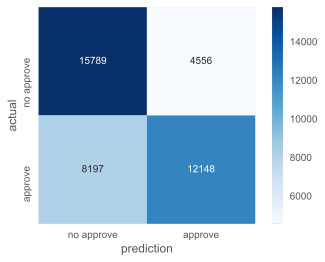

In [49]:
make_confusion_matrix(model)
plt.savefig('confusion_matrix_tunedlr.svg', transparent=True, bbox_inches='tight')

In [2]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(model, threshold), threshold=(0.0,1.0,0.02))

In [56]:
def make_confusion_matrix(model, threshold=0.47):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_te)[:, 1] >= threshold)
    churn_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    heatmap1 = sns.heatmap(churn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no approve', 'approve'],
           yticklabels=['no approve', 'approve']);
    bottom, top = heatmap1.get_ylim() #to fix the cutting off on top/bottom
    heatmap1.set_ylim(bottom + 0.5, top - 0.5) #to fix the cutting off on top/bottom
    plt.xlabel('prediction')
    plt.ylabel('actual')

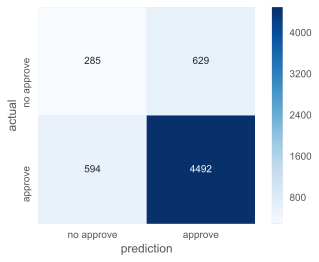

In [57]:
make_confusion_matrix(model)
plt.savefig('confusion_matrix_tunedrf.svg', transparent=True, bbox_inches='tight')

### Precision/Recall

In [40]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = model.predict(X_smoted)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_smoted, y_predict), 
                                                     recall_score(y_smoted, y_predict)))


Default threshold:
Precision: 0.7273,   Recall: 0.5971


In [44]:
# using the new threshold of 0.47
y_predict = (model.predict_proba(X_smoted)[:,1] > 0.47)
print("Threshold of 0.47:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_smoted, y_predict), 
                                                     recall_score(y_smoted, y_predict)))

Threshold of 0.47:
Precision: 0.6045,   Recall: 0.8732


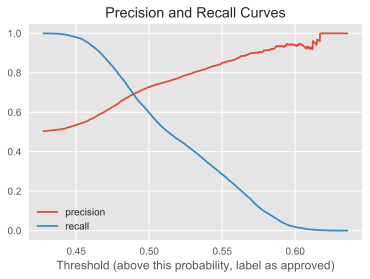

In [53]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_smoted, model.predict_proba(X_smoted)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as approved)');
plt.title('Precision and Recall Curves');
plt.savefig('precision_recall_curve.svg', transparent=True, bbox_inches='tight')


In [67]:
from sklearn.externals import joblib

joblib.dump(model, '/Users/carissasosa/GitHub/Project 5/rfmodelpickle.pkl')

['/Users/carissasosa/GitHub/Project 5/rfmodelpickle.pkl']